In [1]:
#Import required libraries.
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

Using TensorFlow backend.


In [2]:
#ImageDataGenerator Generate batches of tensor image data with real-time data augmentation. 
#The folders contains augmented data as well.
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/home/sushant/Desktop/Study/DL/Project/Final/CASIA1/Train/",target_size=(320,240))
tsdata = ImageDataGenerator()
validdata = tsdata.flow_from_directory(directory="/home/sushant/Desktop/Study/DL/Project/Final/CASIA1/Valid/", target_size=(320,240))

Found 1836 images belonging to 108 classes.
Found 216 images belonging to 108 classes.


In [3]:
# Model for generating architecture proposed in the paper
model = Sequential()
model.add(Conv2D(input_shape=(320,240,3),filters=32,kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(7,7), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=256,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=108, activation="softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [4]:
#optimizer(Adam) with initial learning rate = 0.0001 while training model 
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [5]:
#Training model
from keras.callbacks import ModelCheckpoint, EarlyStopping

#Updates weights of model when the validation accuracy is improved
checkpoint = ModelCheckpoint("model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

#early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

#Steps_per_epoch: No. of times the weights are updated per epoch
hist = model.fit_generator(steps_per_epoch=30,generator=traindata, validation_data= validdata,epochs=30,callbacks=[checkpoint])


Epoch 1/30
30/30 [==============================] - 219s 7s/step - loss: 16.6128 - accuracy: 0.0117 - val_loss: 4.6609 - val_accuracy: 0.0278

Epoch 00001: val_accuracy improved from -inf to 0.02778, saving model to model.h5
Epoch 2/30
30/30 [==============================] - 227s 8s/step - loss: 4.6835 - accuracy: 0.0104 - val_loss: 4.6507 - val_accuracy: 0.0093

Epoch 00002: val_accuracy did not improve from 0.02778
Epoch 3/30
30/30 [==============================] - 218s 7s/step - loss: 4.6591 - accuracy: 0.0128 - val_loss: 4.5875 - val_accuracy: 0.0417

Epoch 00003: val_accuracy improved from 0.02778 to 0.04167, saving model to model.h5
Epoch 4/30
30/30 [==============================] - 220s 7s/step - loss: 4.6257 - accuracy: 0.0240 - val_loss: 4.5231 - val_accuracy: 0.0417

Epoch 00004: val_accuracy did not improve from 0.04167
Epoch 5/30
30/30 [==============================] - 215s 7s/step - loss: 4.5105 - accuracy: 0.0543 - val_loss: 4.1860 - val_accuracy: 0.1528

Epoch 00005

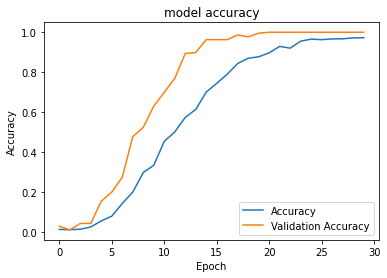

In [6]:
#Presenting accuracy of a model
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

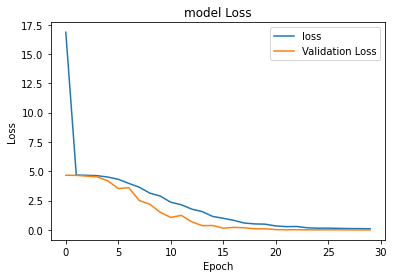

In [7]:
#Presenting loss of a model
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()